In [5]:
import re
import pandas as pd
import numpy as np
import sys
import json
import matplotlib.pyplot as plt
import math
import platform

In [9]:
def dataloader(fname):
	if platform.system() == 'Windows':
		_, tw, dataset, mode = fname.split('\\')[-1].split('.')[0].split('_')
	elif platform.system() == 'Linux':
		_, tw, dataset, mode = fname.split('/')[-1].split('.')[0].split('_')
	print(tw, dataset, mode)

	pat = re.compile(r'TS (\d+) layer (\d+) ([a-zA-Z]*)[:=\s]+(\d+\.\d+e?\+?\d.?)|([a-zA-Z()]+) of layer (\d+) = (\d+\.\d+e?\+?\d.?)')
	with open(fname, 'r') as fr:
		contents = fr.read()
		res = re.findall(pat, contents)
		print(len(res))

	res_dict = {}
	if dataset not in res_dict:
		res_dict[dataset] = {}
		if tw not in res_dict[dataset]:
			res_dict[dataset][tw] = {}
			if mode not in res_dict[dataset][tw]:
				res_dict[dataset][tw][mode] = {}
				for item in res:
					if item[3] == '':  # key, layer, val
						key, layer, val = item[-3:]
						if layer not in res_dict[dataset][tw][mode]:
							res_dict[dataset][tw][mode][layer] = {}
							if key not in res_dict[dataset][tw][mode][layer]:
								res_dict[dataset][tw][mode][layer][key] = [float(val)]
							else:
								res_dict[dataset][tw][mode][layer][key].append(float(val))
						else:
							if key not in res_dict[dataset][tw][mode][layer]:
								res_dict[dataset][tw][mode][layer][key] = [float(val)]
							else:
								res_dict[dataset][tw][mode][layer][key].append(float(val))
					elif item[4] == '': # ts, layer, key, val
						ts, layer, key, val = item[:4]
						# ignore ts here, because list is ordered by ts
						if layer not in res_dict[dataset][tw][mode]:
							res_dict[dataset][tw][mode][layer] = {}
							if key not in res_dict[dataset][tw][mode][layer]:
								res_dict[dataset][tw][mode][layer][key] = [float(val)]
							else:
								res_dict[dataset][tw][mode][layer][key].append(float(val))
						else:
							if key not in res_dict[dataset][tw][mode][layer]:
								res_dict[dataset][tw][mode][layer][key] = [float(val)]
							else:
								res_dict[dataset][tw][mode][layer][key].append(float(val))
	return res_dict

def visualize(res_dict):
	# 可视化每一层的数据
	dataset = list(res_dict.keys())[0]
	tw = list(res_dict[dataset].keys())[0]
	mode = list(res_dict[dataset][tw].keys())[0]
	unique_layers = list(res_dict[dataset][tw][mode].keys())
	unique_keys = res_dict[dataset][tw][mode][unique_layers[0]].keys()
	print(unique_layers, '\n', unique_keys)

	frow = math.ceil(math.sqrt(len(unique_keys)))
	fcol = math.ceil(len(unique_keys) / frow)

	# Create a grid of subplots.
	fig, axs = plt.subplots(frow, fcol, figsize=(25, 20), dpi=300)

	# Flatten the axs array for easy indexing, in case of a 2D configuration.
	axs = axs.flatten()

	for idx, key in enumerate(unique_keys):
		# Select the appropriate subplot.
		ax = axs[idx]
		
		# Prepare the data for the boxplot.
		data = [res_dict[dataset][tw][mode][layer][key] for layer in unique_layers]
		
		# Plot the boxplot on the selected subplot.
		# ax.boxplot(data, labels=unique_layers)
		ax.plot(unique_layers, [np.sum(x) for x in data], label='sum')
		ax.set_title(key)  # Optionally set a title for each subplot to identify the key.


1 DVS128Gesture array
44100
['1', '2', '3', '4', '5', '6', '7'] 
 dict_keys(['readLatency', 'bufferLatency', 'icLatency', 'coreLatencyADC', 'coreLatencyAccum', 'coreLatencyOther', 'readDynamicEnergy', 'leakagePower', 'leakageEnergy', 'bufferDynamicEnergy', 'icDynamicEnergy', 'coreEnergyADC', 'coreEnergyAccum', 'coreEnergyOther', 'coreEnergyPopcnt', 'Average(denseRatio)', 'Max(denseRatio)', 'Min(denseRatio)', 'Average(recoverFactor)', 'Max(recoverFactor)', 'Min(recoverFactor)'])


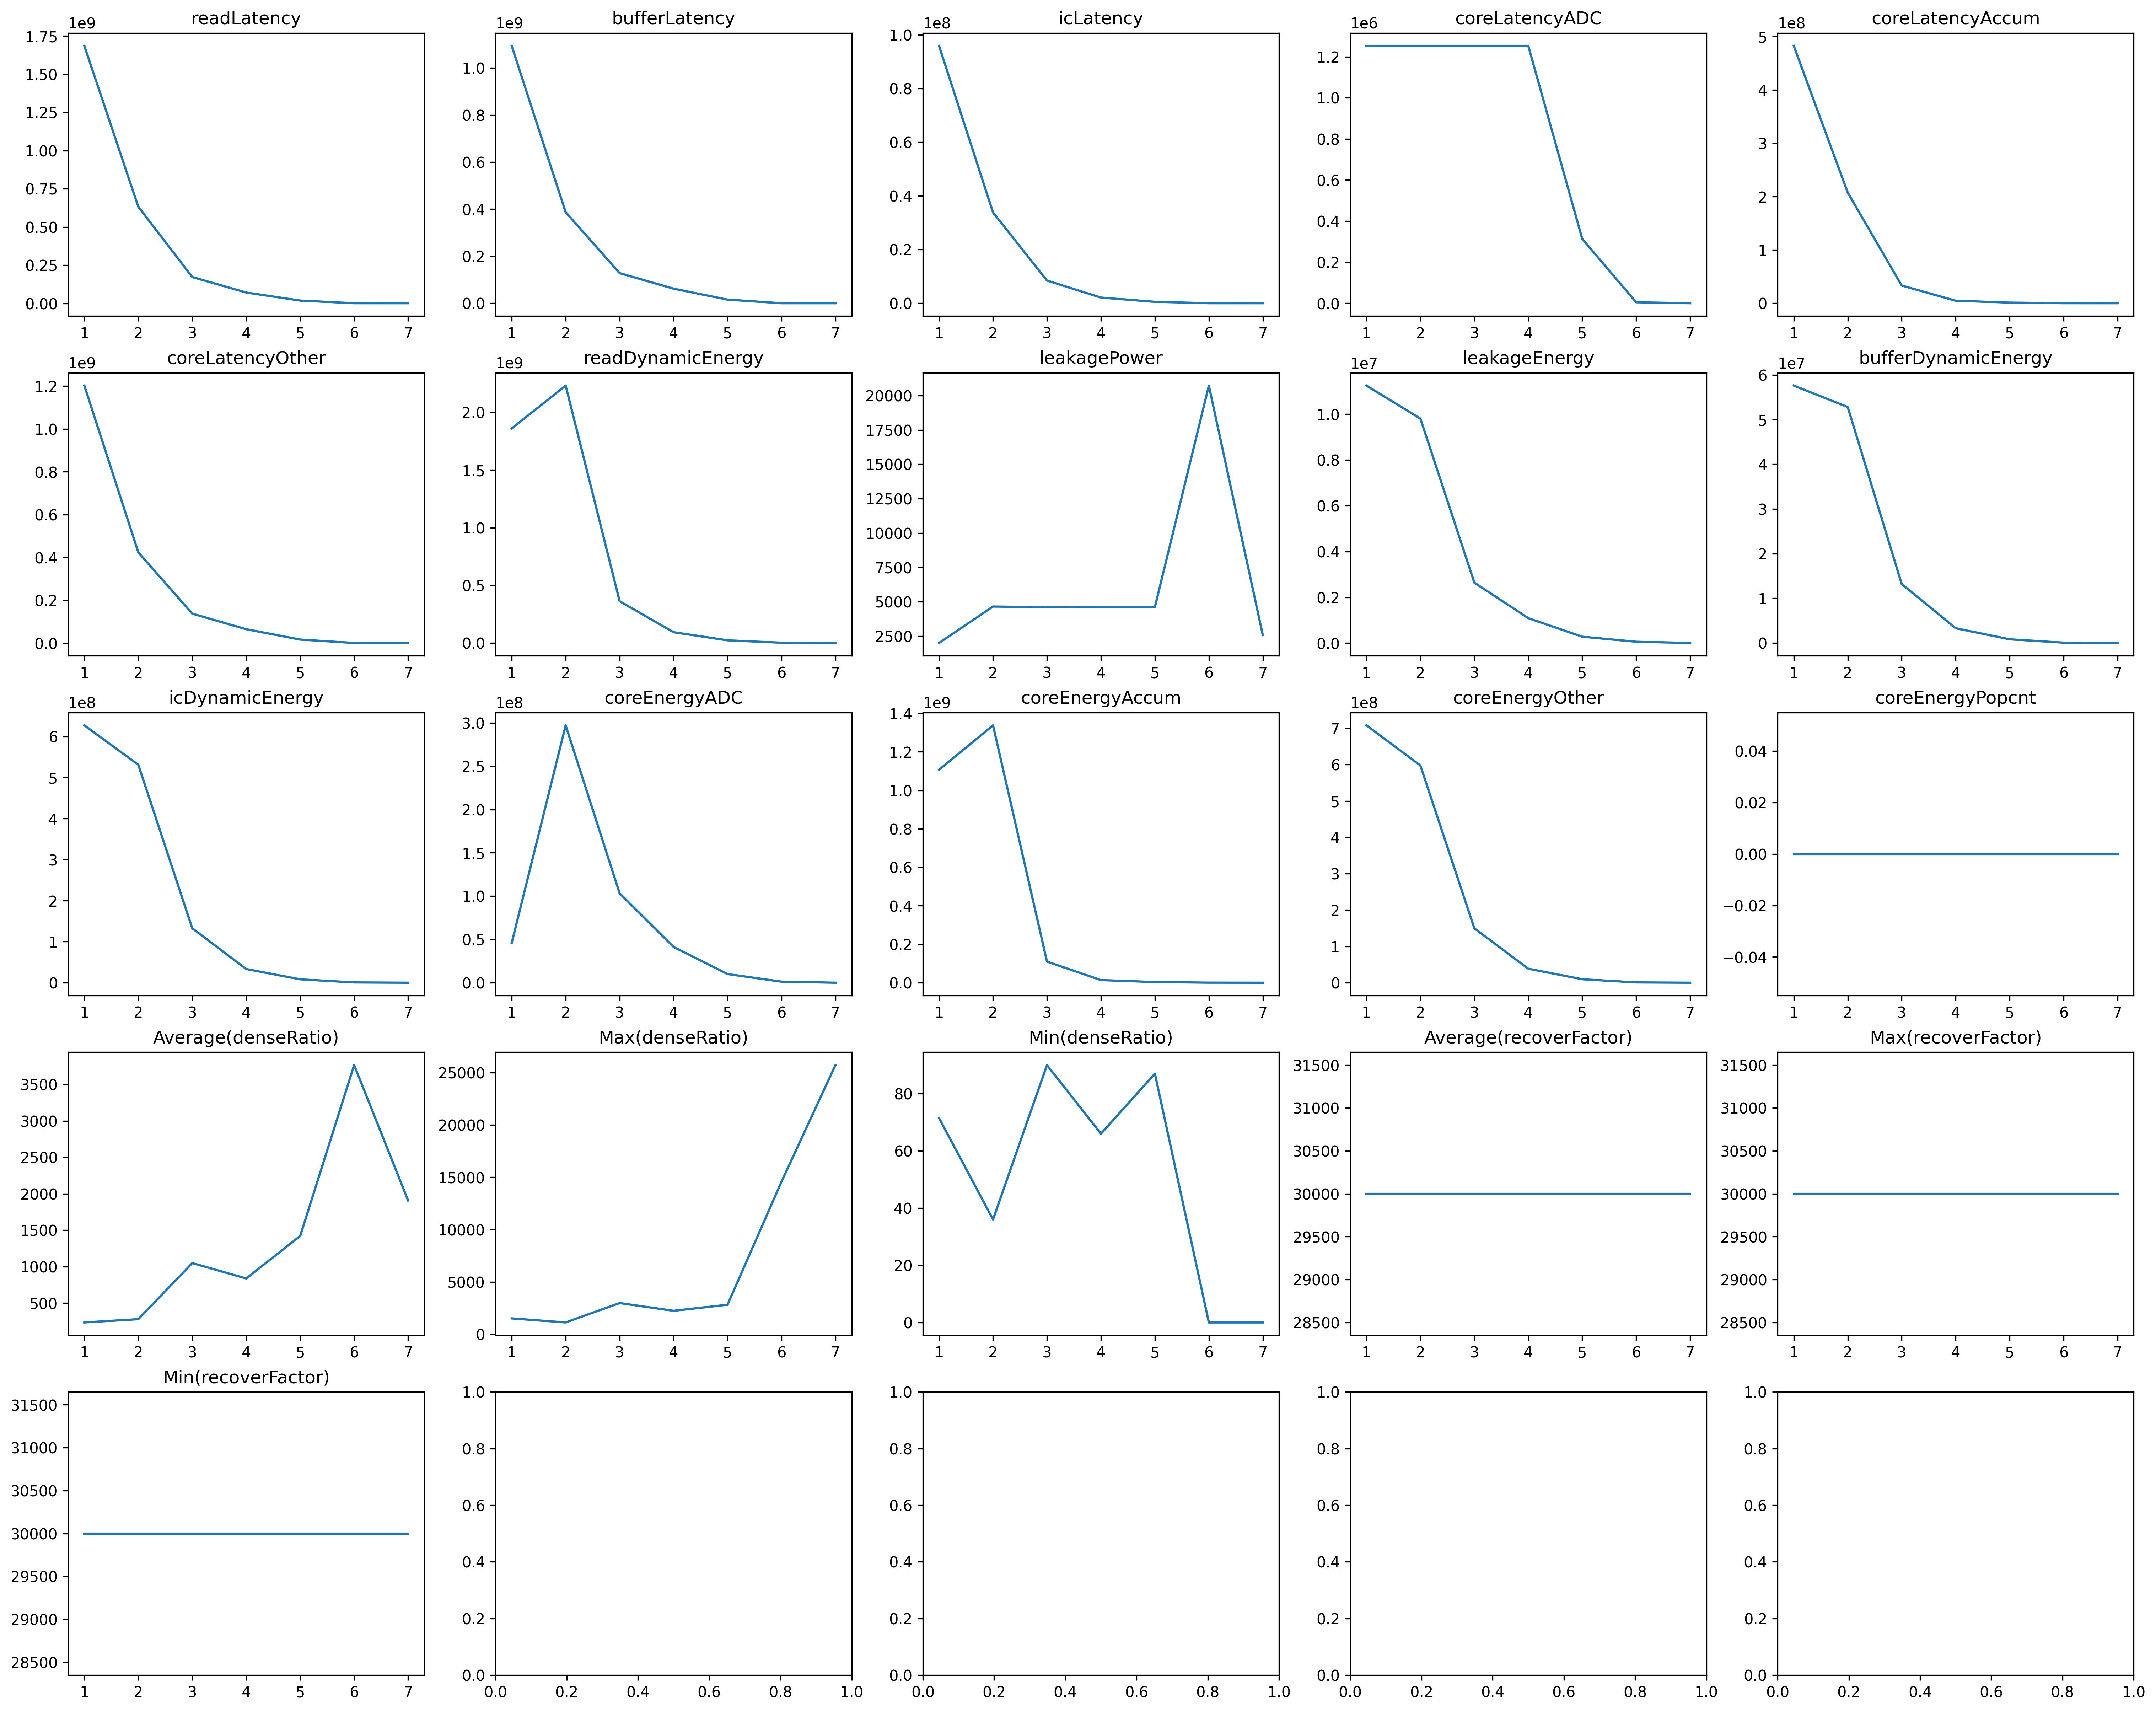

In [11]:
fname = "../err_logs/PyNeuroSim_1_DVS128Gesture_array.err"
res_dict = dataloader(fname)
visualize(res_dict)